In [158]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [37]:
source = 'Country-data.csv'
df = pd.read_csv(source)
scaler = StandardScaler()
df
X = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
Xs = scaler.fit_transform(X)

In [106]:
Xs = Xs.T
cov_mat = np.cov(Xs)

In [107]:
eigenval, eigenvec = np.linalg.eig(cov_mat)
eigenval

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.06727787, 0.08884738, 0.1141221 ])

In [108]:
sum = np.sum(eigenval)

In [111]:
sum1 = 0
for i in range(6):
    sum1 += eigenval[i]/sum
    print(f'First {i+1} Pricipal Components explain {sum1*100}% of the variance ')
print(sum1)
Xs = Xs.T

First 1 Pricipal Components explain 45.95173978609592% of the variance 
First 2 Pricipal Components explain 63.13336543771412% of the variance 
First 3 Pricipal Components explain 76.13762433466717% of the variance 
First 4 Pricipal Components explain 87.19078614023907% of the variance 
First 5 Pricipal Components explain 94.53099756439511% of the variance 
First 6 Pricipal Components explain 97.01523224082285% of the variance 
0.9701523224082286


In [112]:
pc1 = Xs.dot(eigenvec[0])
pc2 = Xs.dot(eigenvec[1])
pc3 = Xs.dot(eigenvec[2])
pc4 = Xs.dot(eigenvec[3])
pc5 = Xs.dot(eigenvec[4])

In [113]:
X_pca = pd.DataFrame(pc1, columns=['PC1'])
X_pca['PC2'] = pc2
X_pca['PC3'] = pc3
X_pca['PC4'] = pc4
X_pca['PC5'] = pc5
X_pca.head()

X_pca_mat = X_pca.copy()
X_pca_mat = X_pca_mat.values

In [114]:
X_pca_mat

array([[ 1.90316827e-01,  5.07999142e-01, -1.95997605e-01,
         1.35320802e-01,  1.23233076e+00],
       [ 3.76927083e-01,  8.56213277e-01, -3.32363171e-01,
        -4.68202034e-02, -3.76904115e-01],
       [-1.63423463e-01,  7.26396734e-01, -3.45380292e-01,
        -5.98820040e-01,  1.12982824e-01],
       [-4.93872428e-01, -5.96920096e-01, -7.98500252e-01,
        -1.64963931e+00,  1.03015939e+00],
       [-2.69525066e-01,  2.33076852e-01, -3.08420996e-01,
        -1.16791289e-01, -3.90516620e-01],
       [ 2.12845743e-01,  8.62045917e-01,  7.37196279e-01,
         6.14250968e-01, -1.16787472e-01],
       [ 5.33344260e-01,  1.12166571e+00, -8.44516726e-01,
        -1.50171003e-01,  1.08350504e-01],
       [ 2.10569782e-03, -6.86634319e-01,  7.81535244e-01,
         2.24733849e+00, -4.75832664e-01],
       [-3.25566145e-01, -1.33216760e+00,  1.15602362e+00,
         1.69097761e+00, -1.23955683e+00],
       [ 7.53960349e-01,  4.59572761e-02,  4.42762513e-01,
        -7.01450353e-01

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

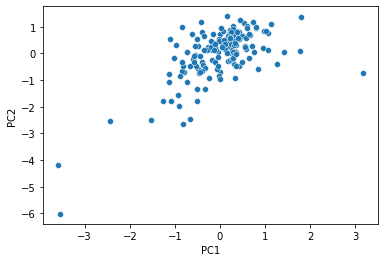

In [115]:
sns.scatterplot(x = X_pca['PC1'], y = X_pca['PC2'], data = X_pca)    

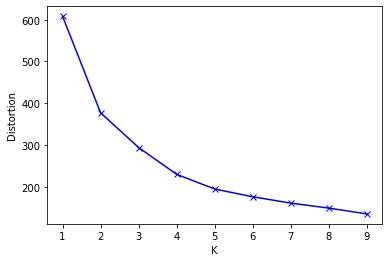

In [157]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [159]:
kmeans = KMeans(n_clusters = 4, max_iter = 1000).fit(X_pca)
prediction = kmeans.predict(X_pca)
prediction

array([0, 3, 0, 0, 3, 3, 0, 1, 1, 0, 3, 3, 0, 3, 3, 1, 0, 0, 3, 0, 3, 0,
       3, 1, 3, 0, 3, 0, 0, 1, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3,
       1, 3, 3, 0, 3, 3, 0, 3, 0, 1, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 3, 1, 0, 0, 3, 3, 1, 3, 1, 0, 1, 3, 0, 0, 3, 1, 3, 0, 3, 3, 3,
       3, 3, 3, 2, 3, 0, 0, 3, 3, 0, 2, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       1, 1, 0, 3, 1, 3, 0, 3, 3, 0, 0, 3, 1, 1, 3, 0, 0, 0, 3, 0, 3, 3,
       3, 2, 3, 3, 3, 0, 3, 1, 0, 0, 0, 3, 1, 1, 0, 0, 3, 3, 0, 0, 3, 3,
       0, 0, 3, 3, 1, 1, 3, 0, 0, 3, 3, 0, 0])

In [160]:
silhouette_score(X_pca, kmeans.labels_, metric='euclidean')

0.2712460480350674

In [161]:
class Kmeans:
    def __init__(self, k = 4, epochs = 1000):
        self.k = k
        self.epochs = epochs
    
    def fit(self, X):
        num_feat = X.shape[1]
        centres = np.zeros(self.k * num_feat).reshape(self.k, num_feat)
        categories = np.zeros(num_feat * self.k * len(X)).reshape(self.k, len(X), num_feat)
        new_centres = np.zeros(self.k*num_feat).reshape(self.k, num_feat)
                
        for i in range(self.k):
            var = random.randint(0, len(X))
            centres[i] = X[var]
        
        print(centres)
        result = np.zeros(len(X))
        epoch = 0
        
        while(epoch < self.epochs):
            sum = np.zeros(self.k).astype(int)
            for x in range(len(X)):
                
                distances = np.zeros(self.k)
                for i in range(len(centres)):
                    distances[i] = (np.sum((X[x] - centres[i])**2))
                for i in range(len(centres)):
                    if distances[i] == np.min(distances):
                        result[x] = i
                        categories[i, sum[i]] = X[x]
                        sum[i] += 1

            for i in range(self.k):
                for j in range(num_feat):
                    new_centres[i, j] = np.sum(categories[i, j]/sum[i])
            centres = new_centres
            
            epoch += 1
        print(result)
        print(silhouette_score(X, result, metric='euclidean'))


In [164]:
k = Kmeans()
k.fit(X_pca_mat)

[[-0.9765244   0.2984465  -0.14104611 -0.38108581 -0.48574869]
 [-0.44827767 -0.11074526 -0.56630567 -1.14012981 -0.79397189]
 [ 0.43022014  0.7925252  -0.14578816 -0.00665093  0.05308912]
 [ 0.20427401  0.71564245 -0.04485538 -0.13112554  0.38020343]]


<ipython-input-161-2c65d19911bf>:35: RuntimeWarning: divide by zero encountered in true_divide
  new_centres[i, j] = np.sum(categories[i, j]/sum[i])
C:\Users\aadit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 2. 2. 1. 0. 1. 1. 0. 1. 2. 0. 1. 2. 2. 2. 0. 2. 0. 1. 1. 1. 1.
 0. 0. 1. 2. 0. 1. 0. 0. 0. 1. 0. 1. 0. 2. 2. 1. 0. 1. 2. 2. 1. 0. 0. 0.
 0. 2. 0. 2. 2. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 2. 1. 2. 1. 0. 0. 0.
 1. 2. 1. 1. 0. 1. 2. 0. 0. 1. 2. 2. 0. 0. 2. 1. 2. 2. 2. 2. 0. 0. 0. 2.
 2. 0. 2. 2. 2. 1. 1. 2. 2. 0. 0. 0. 0. 0. 1. 1. 0. 2. 1. 2. 0. 2. 2. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 2. 0. 1. 2. 1. 2. 2. 2. 2. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 2. 0. 0. 0. 2. 1. 2. 1. 0. 2. 1. 1. 1. 0. 0. 0. 2. 0. 0.]
0.21783015187654256
